In [1]:
%matplotlib inline

import pandas
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats
from sklearn import metrics

import tensorflow as tf
from tensorflow.contrib import layers
from tensorflow.contrib import learn

/Users/ipolosukhin/projects/tf_examples/.env/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Sets logging to INFO to see all information from TensorFlow.

tf.logging.set_verbosity(tf.logging.INFO)

In [3]:
BASE_DIR = 'dropout_classification/'

In [4]:
# Load data.

train = pandas.read_csv('data/titanic_train.csv')
y, X = train['Survived'], train[['Age', 'SibSp', 'Fare']].fillna(0)
train_x, test_x, train_y, test_y = learn.estimators._sklearn.train_test_split(X, y, test_size=0.2, random_state=42)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
classifier = learn.LinearClassifier(
    feature_columns=[layers.real_valued_column('', dimension=3)], model_dir=BASE_DIR + 'linear')
classifier.fit(x=train_x, y=train_y, steps=100)

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=3, default_value=None, dtype=tf.float32)
INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Restored model from dropout_classification/linear/model.ckpt-400-?????-of-00001
INFO:tensorflow:Step 401: loss = 0.619374
INFO:tensorflow:Saving checkpoints for 401 into dropout_classification/linear/model.ckpt.
INFO:tensorflow:Saving checkpoints for 500 into dropout_classification/linear/model.ckpt.
INFO:tensorflow:Loss for final step: 0.619366.
INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=3, default_value=None, dtype=tf.float32)
INFO:tensorflow:Restored model from dropout_classification/linear/model.ckpt-500-?????-of-00001
INFO:tensorflow:Eval steps [0,inf) for training step 500.
INFO:tensorflow:Input iterator is exhausted.
INFO:tensorflow:Saving evaluation summary for 500 step: loss = 0.626126, auc = 0.685425, accuracy/threshold_0.500000_mean = 0.681564, label

{'loss': 0.62612557, 'auc': 0.68542516, 'global_step': 500, 'accuracy/threshold_0.500000_mean': 0.68156427, 'labels/actual_target_mean': 0.36312848, 'recall/positive_threshold_0.500000_mean': 0.24615385, 'labels/prediction_mean': 0.37804177, 'accuracy/baseline_target_mean': 0.36312848, 'precision/positive_threshold_0.500000_mean': 0.66666669, 'accuracy': 0.68156427}


In [38]:
pandas.DataFrame([classifier.evaluate(x=test_x, y=test_y)])

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=3, default_value=None, dtype=tf.float32)
INFO:tensorflow:Restored model from dropout_classification/linear/model.ckpt-500-?????-of-00001
INFO:tensorflow:Eval steps [0,inf) for training step 500.
INFO:tensorflow:Input iterator is exhausted.
INFO:tensorflow:Saving evaluation summary for 500 step: loss = 0.626126, auc = 0.685425, accuracy/threshold_0.500000_mean = 0.681564, labels/actual_target_mean = 0.363128, recall/positive_threshold_0.500000_mean = 0.246154, labels/prediction_mean = 0.378042, accuracy/baseline_target_mean = 0.363128, precision/positive_threshold_0.500000_mean = 0.666667, accuracy = 0.681564


,accuracy,accuracy/baseline_target_mean,accuracy/threshold_0.500000_mean,auc,global_step,labels/actual_target_mean,labels/prediction_mean,loss,precision/positive_threshold_0.500000_mean,recall/positive_threshold_0.500000_mean
0,0.681564,0.363128,0.681564,0.685425,500,0.363128,0.378042,0.626126,0.666667,0.246154


In [43]:
dnn_classifier = learn.DNNClassifier(hidden_units=[5, 5],
    feature_columns=[layers.real_valued_column('', dimension=3)], model_dir=BASE_DIR + 'dnn', enable_centered_bias=False)
dnn_classifier.fit(x=train_x, y=train_y, steps=500)

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=3, default_value=None, dtype=tf.float32)
INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Step 1: loss = 2.20242
INFO:tensorflow:Step 101: loss = 0.615088
INFO:tensorflow:Step 201: loss = 0.612931
INFO:tensorflow:Saving checkpoints for 300 into dropout_classification/dnn/model.ckpt.
INFO:tensorflow:Step 301: loss = 0.612602
INFO:tensorflow:Step 401: loss = 0.612483
INFO:tensorflow:Saving checkpoints for 500 into dropout_classification/dnn/model.ckpt.
INFO:tensorflow:Loss for final step: 0.61237.


DNNClassifier(hidden_units=[5, 5], dropout=None, optimizer=None, feature_columns=[_RealValuedColumn(column_name='', dimension=3, default_value=None, dtype=tf.float32)])

In [44]:
pandas.DataFrame([dnn_classifier.evaluate(x=test_x, y=test_y)])

INFO:tensorflow:Transforming feature_column _RealValuedColumn(column_name='', dimension=3, default_value=None, dtype=tf.float32)
INFO:tensorflow:Restored model from dropout_classification/dnn/model.ckpt-500-?????-of-00001
INFO:tensorflow:Eval steps [0,inf) for training step 500.
INFO:tensorflow:Input iterator is exhausted.
INFO:tensorflow:Saving evaluation summary for 500 step: loss = 0.604655, auc = 0.680634, accuracy/threshold_0.500000_mean = 0.692737, labels/actual_target_mean = 0.363128, recall/positive_threshold_0.500000_mean = 0.338462, labels/prediction_mean = 0.380738, accuracy/baseline_target_mean = 0.363128, precision/positive_threshold_0.500000_mean = 0.647059, accuracy = 0.692737


,accuracy,accuracy/baseline_target_mean,accuracy/threshold_0.500000_mean,auc,global_step,labels/actual_target_mean,labels/prediction_mean,loss,precision/positive_threshold_0.500000_mean,recall/positive_threshold_0.500000_mean
0,0.692737,0.363128,0.692737,0.680634,500,0.363128,0.380738,0.604655,0.647059,0.338462


In [152]:
def custom_dnn_model(feature, target):
    target = tf.one_hot(target, 2, 1.0, 0.0)
    feature = layers.fully_connected(feature, 10)
    feature = layers.fully_connected(feature, 10)
    logits = layers.fully_connected(feature, 2, activation_fn=None)
    loss = tf.contrib.losses.softmax_cross_entropy(logits, target)
    train_op = layers.optimize_loss(loss, tf.contrib.framework.get_global_step(), learning_rate=0.05, optimizer='Adagrad')
    return tf.argmax(logits, dimension=1), loss, train_op

custom_dnn_classifier = learn.Estimator(model_fn=custom_dnn_model, model_dir=BASE_DIR + 'custom_dnn')
custom_dnn_classifier.fit(x=train_x, y=train_y, steps=1000)

INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Step 1: loss = 4.1098
INFO:tensorflow:Step 101: loss = 0.611304
INFO:tensorflow:Step 201: loss = 0.602934
INFO:tensorflow:Saving checkpoints for 300 into dropout_classification/custom_dnn/model.ckpt.
INFO:tensorflow:Step 301: loss = 0.600027
INFO:tensorflow:Step 401: loss = 0.598391
INFO:tensorflow:Step 501: loss = 0.59656
INFO:tensorflow:Saving checkpoints for 600 into dropout_classification/custom_dnn/model.ckpt.
INFO:tensorflow:Step 601: loss = 0.595599
INFO:tensorflow:Step 701: loss = 0.594087
INFO:tensorflow:Step 801: loss = 0.593035
INFO:tensorflow:Saving checkpoints for 900 into dropout_classification/custom_dnn/model.ckpt.
INFO:tensorflow:Step 901: loss = 0.592026
INFO:tensorflow:Saving checkpoints for 1000 into dropout_classification/custom_dnn/model.ckpt.
INFO:tensorflow:Loss for final step: 0.591457.


Estimator(params=None)

In [151]:
pandas.DataFrame([custom_dnn_classifier.evaluate(x=test_x, y=test_y,
                                                 metrics={'accuracy': tf.contrib.metrics.streaming_accuracy})])

NameError: name 'custom_dnn_classifier' is not defined

In [88]:
def uncertanty_dnn_model(feature, target, mode):
    target = tf.one_hot(target, 2, 1.0, 0.0)
    def get_logits(feature, is_training_or_sample):
        feature = layers.fully_connected(feature, 30)
        feature = layers.dropout(feature, 0.9, is_training=is_training_or_sample)
        feature = layers.fully_connected(feature, 30)
        feature = layers.dropout(feature, 0.9, is_training=is_training_or_sample)
        return layers.fully_connected(feature, 2, activation_fn=None)
    with tf.variable_scope('dnn'):
        logits = get_logits(feature, mode == learn.ModeKeys.TRAIN)
    with tf.variable_scope('dnn', reuse=True):
        sampled_logits = get_logits(feature, True)
    loss = tf.contrib.losses.softmax_cross_entropy(logits, target)
    train_op = layers.optimize_loss(loss, tf.contrib.framework.get_global_step(), learning_rate=0.05, optimizer='Adagrad')
    predictions = {'classes': tf.argmax(logits, dimension=1), 
                   'probabilities': tf.nn.softmax(logits),
                   'sampled_probabilities': tf.nn.softmax(sampled_logits)}
    return predictions, loss, train_op

dropout_dnn_classifier = learn.Estimator(model_fn=uncertanty_dnn_model, model_dir=BASE_DIR + 'dnn_dropout')
dropout_dnn_classifier.fit(x=train_x, y=train_y, steps=1000)

INFO:tensorflow:Create CheckpointSaver
INFO:tensorflow:Restored model from dropout_classification/dnn_dropout/model.ckpt-1000-?????-of-00001
INFO:tensorflow:Step 1001: loss = 0.608229
INFO:tensorflow:Saving checkpoints for 1001 into dropout_classification/dnn_dropout/model.ckpt.
INFO:tensorflow:Step 1101: loss = 0.610913
INFO:tensorflow:Step 1201: loss = 0.602962
INFO:tensorflow:Step 1301: loss = 0.59628
INFO:tensorflow:Saving checkpoints for 1301 into dropout_classification/dnn_dropout/model.ckpt.
INFO:tensorflow:Step 1401: loss = 0.60301
INFO:tensorflow:Step 1501: loss = 0.595864
INFO:tensorflow:Step 1601: loss = 0.59532
INFO:tensorflow:Saving checkpoints for 1601 into dropout_classification/dnn_dropout/model.ckpt.
INFO:tensorflow:Step 1701: loss = 0.601391
INFO:tensorflow:Step 1801: loss = 0.59406
INFO:tensorflow:Step 1901: loss = 0.594063
INFO:tensorflow:Saving checkpoints for 1901 into dropout_classification/dnn_dropout/model.ckpt.
INFO:tensorflow:Saving checkpoints for 2000 into 

Estimator(params=None)

In [89]:
pred_y =  dropout_dnn_classifier.predict(x=test_x, outputs=['classes'])['classes']
pandas.DataFrame([{'accuracy': metrics.accuracy_score(pred_y, test_y)}])

INFO:tensorflow:Loading model from checkpoint: dropout_classification/dnn_dropout/model.ckpt-2000-?????-of-00001.


,accuracy
0,0.709497


In [90]:
# Sample predictions N times.
n_samples = 20

samples = []
x_samples = np.concatenate([test_x for _ in range(n_samples)])
y_samples = dropout_dnn_classifier.predict(x=x_samples, outputs=['sampled_probabilities'])['sampled_probabilities']
samples = [y_samples[i * len(test_x):(i + 1) * len(test_x)] for i in range(n_samples)]

INFO:tensorflow:Loading model from checkpoint: dropout_classification/dnn_dropout/model.ckpt-2000-?????-of-00001.


In [95]:
def cross_entropy(a):
    # Cross entropy is mean of -p*log(q).
    return np.array([-x[1] * np.log(x[1]) for x in a]).mean()

uncertanty = []
for i in range(test_x.shape[0]):
    a = [samples[j][i] for j in range(n_samples)]
    uncertanty.append(cross_entropy(a))

,Range,Precision,Count
0,0.00-0.25,NaN,0
1,0.25-0.30,0.750000,16
2,0.30-0.33,0.769231,39
3,0.33-0.34,0.810345,58
4,0.34-0.36,0.805556,72
5,0.36-0.37,0.750000,112
6,0.37-0.40,0.709497,179


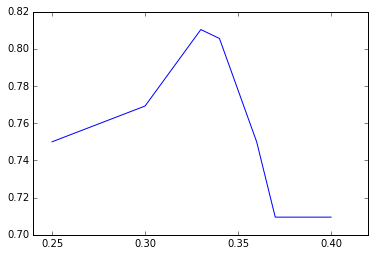

In [148]:
correctness = correctness.reset_index()['Survived']
correctness = test_y == pred_y
counts, ranges = np.histogram(uncertanty, bins=5)
ranges = np.array([0.0, 0.25, 0.3, 0.33, 0.34, 0.36, 0.37, 0.4])
precision, counts = [], []

# Compute precision per range of uncertanty.
for i in range(len(ranges)):
#    mask = np.logical_and(uncertanty >= ranges[i], uncertanty < ranges[i + 1])
    mask = uncertanty < ranges[i]
    precision.append(correctness[mask].mean())
    counts.append(mask.sum())


str_ranges = ['%.2f-%.2f' % (ranges[i - 1], ranges[i]) for i in range(1, len(ranges))]
_ = plt.plot(ranges, precision)
pandas.DataFrame(zip(str_ranges, precision, counts), columns=['Range', 'Precision', 'Count'])

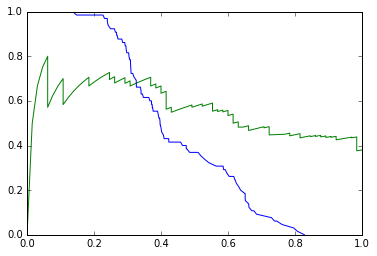

In [149]:
# Precision vs threshold plot.
th, precision, recall = metrics.precision_recall_curve(test_y, prob_y[:, 1])
_ = plt.plot(precision, th, c='g')
_ = plt.plot(recall, precision[:-1])